# Copy from ds test (n-samples with object and n-samples without object from original dataset)

In [26]:
import glob
import os
import numpy as np
import shutil
from skimage import io

In [25]:
def substractTestSamples(dstFld="../../ds/tiles_256_256_27_test/", 
                         n_samples=2,
                         dsFld = '../../ds/tiles_256_256_27/'):

    """
    Create test data from original ds
    Randomly choosing n-tiff with object and
    n-tiff without object
    
    If count tiff in folder is less than n*2 
    skip folder
    
    Move selected object to dstFld
    
    """
    
    for fld in os.listdir(dsFld):
        withObject = list(glob.glob(f'{dsFld}/{fld}/*with_object*.tif'))
        withoutObject = list(glob.glob(f'{dsFld}/{fld}/*no_object*.tif'))
        #print (withObject[-2:])
        #print (os.path.join(dstFld, os.path.basename(withoutObject[-n_samples:][0])))
        #print (len(withoutObject))
        selectionForTest = withoutObject[-n_samples:] + withObject[-n_samples:]
        
        if len(selectionForTest) == 0:
            continue
        
        for tif in selectionForTest:
            srcName = os.path.basename(tif)
            dst = os.path.join(dstFld,srcName)
            #print (f'{tif} \n >>> {dst}')
            shutil.move(tif,dst)
        
substractTestSamples()

In [4]:
def getBandName(bandIdx):
    """
    Return index of band in fel dataset
    """
    bandsDict = {0: 'maskBand',
     1: 'B01new',
     2: 'B02new',
     3: 'B03new',
     4: 'B04new',
     5: 'B05new',
     6: 'B06new',
     7: 'B07new',
     8: 'B08new',
     9: 'B8Anew',
     10: 'B09new',
     11: 'B10new',
     12: 'B11new',
     13: 'B12new',
     14: 'B01old',
     15: 'B02old',
     16: 'B03old',
     17: 'B04old',
     18: 'B05old',
     19: 'B06old',
     20: 'B07old',
     21: 'B08old',
     22: 'B8Aold',
     23: 'B09old',
     24: 'B10old',
     25: 'B11old',
     26: 'B12old'}
    return bandsDict[bandIdx]

In [18]:
def getBandIdxByName(bandName):
    """
    Return index of band in fel dataset
    """
    bandsDict = {0: 'maskBand',
     1: 'B01new',
     2: 'B02new',
     3: 'B03new',
     4: 'B04new',
     5: 'B05new',
     6: 'B06new',
     7: 'B07new',
     8: 'B08new',
     9: 'B8Anew',
     10: 'B09new',
     11: 'B10new',
     12: 'B11new',
     13: 'B12new',
     14: 'B01old',
     15: 'B02old',
     16: 'B03old',
     17: 'B04old',
     18: 'B05old',
     19: 'B06old',
     20: 'B07old',
     21: 'B08old',
     22: 'B8Aold',
     23: 'B09old',
     24: 'B10old',
     25: 'B11old',
     26: 'B12old'}
    for value in bandsDict.items():
        if value[1] == bandName:
            return (value[0])

# Read forest cover data by tile extent

In [3]:
import gdal

In [4]:
def getRasterExtent (rasterPath):
    
    """
    Get raster extent
    """
    
    infoOptions = gdal.InfoOptions(format='json')
    infoResult = gdal.Info(rasterPath,options=infoOptions)
    # return as -te <xmin> <ymin> <xmax> <ymax>
    return ((infoResult["cornerCoordinates"]['lowerLeft'])
        +(infoResult["cornerCoordinates"]['upperRight']))

In [17]:
extent = getRasterExtent(
     '../../ds/tiles_256_256_27_add/T37WFM_pair_0_2020_07_18_2020_10_04.tif/T37WFM_pair_0_2020_07_18_2020_10_04.tif_10451_4625_with_object.tif'
 )
print(extent)

[645930.0, 7094850.0, 648490.0, 7097410.0]


In [50]:
# tr_opts = gdal.TranslateOptions(format="GTiff", projWin=[extent[1],extent[2],extent[3], extent[0]])
tr_opts = gdal.TranslateOptions(
    format="GTiff", 
    #projWin=[extent[0],extent[3],extent[2], extent[1]],
    #[645930.0, 10.0, 0.0, 7094850.0, 0.0, 10.0]
    srcWin=[extent[0] - 645930.0 ,extent[3] - 7094850.0,256, 256],
    outputType=gdal.GDT_Byte
)
print([extent[0],extent[3],extent[2], extent[1]])
gdal.Translate('./addData/tempClip/temp.tif', './addData/treeCover/T37WFM.tif',options=tr_opts)

[645930.0, 7097410.0, 648490.0, 7094850.0]


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f90eefcf090> >

In [48]:
# tr_opts = gdal.TranslateOptions(format="GTiff", projWin=[extent[1],extent[2],extent[3], extent[0]])
warp_opts = gdal.WarpOptions(
    outputBounds=[extent[0],extent[3],extent[2], extent[1]],
    outputType=gdal.GDT_Byte
)

gdal.Warp('./addData/tempClip/temp.tif', './addData/treeCover/T37WFM.tif',options=warp_opts)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f90eef94e10> >

In [14]:
getRasterExtent('./addData/treeCover/T37WFM.tif')

[596465.475, 7084764.815, 717435.475, 7205674.815]

In [49]:
arr = io.imread('./addData/tempClip/temp.tif')
np.unique(arr)

array([255], dtype=uint8)

In [46]:
infoOptions = gdal.InfoOptions(format='json')
print(gdal.Info('./addData/tempClip/temp.tif',options=infoOptions))

{'description': './addData/tempClip/temp.tif', 'driverShortName': 'GTiff', 'driverLongName': 'GeoTIFF', 'files': ['./addData/tempClip/temp.tif'], 'size': [256, 256], 'coordinateSystem': {'wkt': 'PROJCRS["WGS 84 / UTM zone 37N",\n    BASEGEOGCRS["WGS 84",\n        DATUM["World Geodetic System 1984",\n            ELLIPSOID["WGS 84",6378137,298.257223563,\n                LENGTHUNIT["metre",1]]],\n        PRIMEM["Greenwich",0,\n            ANGLEUNIT["degree",0.0174532925199433]],\n        ID["EPSG",4326]],\n    CONVERSION["UTM zone 37N",\n        METHOD["Transverse Mercator",\n            ID["EPSG",9807]],\n        PARAMETER["Latitude of natural origin",0,\n            ANGLEUNIT["degree",0.0174532925199433],\n            ID["EPSG",8801]],\n        PARAMETER["Longitude of natural origin",39,\n            ANGLEUNIT["degree",0.0174532925199433],\n            ID["EPSG",8802]],\n        PARAMETER["Scale factor at natural origin",0.9996,\n            SCALEUNIT["unity",1],\n            ID["EPSG"

# Check tiles in test data

In [5]:
import glob 

In [8]:
tifs = glob.glob('../../ds/tiles_256_256_27_test/*with_object.tif')
print(len(tifs))

143


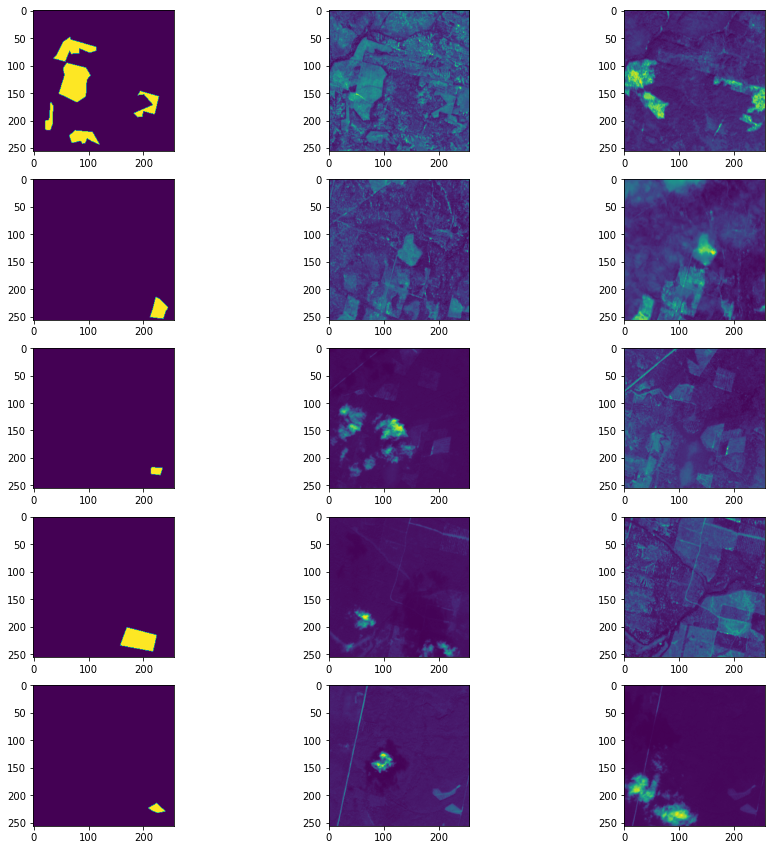

In [32]:
from skimage import io
from matplotlib import pyplot as plt
import os
#testImg = '../../ds/tiles_256_256_27_test/T39VXH_pair_1.tif_5056_1883_with_object.tif'
#img = io.imread(testImg)/65536

fig, axes = plt.subplots(5, 3, figsize=(15,15))

for idx in range(0, len(tifs[:5])):
    img = io.imread(tifs[idx])/65536
    axes[idx,0].imshow(img[:,:,0])
    axes[idx,1].imshow(img[:,:,4])
    axes[idx,2].imshow(img[:,:,17])
    #axes[idx].set_title(tifs[idx])

plt.show()

#axes[0]("off")
#for idx in range(1,len(tifs[:10])):
#    axes[0,1].imshow(img[:,:,17],)
#    axes[1,1].imshow(img[:,:,4])
#    axes[2,1].imshow(img[:,:,0])